# 0. Setup

### Import packages 

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading data

In [3]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')

In [4]:
dataset = {'aisles' : aisles, 'departments' : departments, 'orders' : orders, 'products' : products, 'order_product_prior' : order_products_prior, 'order_products_train' : order_products_train}

# 1. Exploratory analysis

Datasets : An anonymized dataset containing a sample of over 3 million grocery orders from more than 200 000 instacart users, published in 2017. Between 4 and 100 of orders are provided per user, with sequence of products purchased in each order.  

In [5]:
# Overview
df_shapes = pd.DataFrame(columns = ['Dataset', 'Row count', 'Col count','Total null count'])
for n, d in dataset.items():
    df_shapes.loc[len(df_shapes)] = [n, d.shape[0], d.shape[1], d.isna().sum().sum()]
df_shapes

,Dataset,Row count,Col count,Total null count
0,aisles,134,2,0
1,departments,21,2,0
2,orders,3421083,7,206209
3,products,49688,4,0
4,order_product_prior,32434489,4,0
5,order_products_train,1384617,4,0


### `aisles` table

Columns
- aisle_id : unique id
- aisle

In [6]:
# A look at the aisle table
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### `departments` table

Columns
- department_id : unique id
- department

In [9]:
# A look at the departments table
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### `orders` table

Columns
- order_id : unique id
- user_id
- eval_set : divided the data into 'prior', 'eval', 'train'. Only the last order of a user is categorized as 'eval' or 'train'. 
- order_number : order number of the user
- order_dow : day of week
- order_hour_of_day
- days_since_prior_order


In [ ]:
# A look at the orders table
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [38]:
# Examine statistics of numerical columns
pd.options.display.float_format = '{:.0f}'.format
orders.drop(columns=['order_id','user_id']).describe()

,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3421083,3421083,3421083,3214874
mean,17,3,13,11
std,18,2,4,9
min,1,0,0,0
25%,5,1,10,4
50%,11,3,13,7
75%,23,5,16,15
max,100,6,23,30


In [ ]:
# Identify number of null values
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [60]:
# Verify if null values in days_since_prior_order are due to first purchases per person
orders.isna().sum().sum() == len(orders.user_id.unique())

True

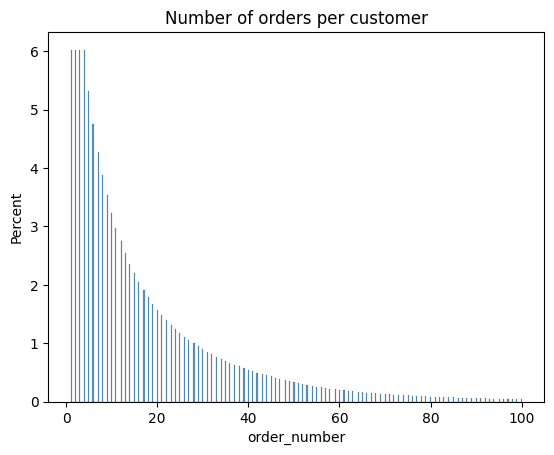

In [69]:
# DIsplay order numbers per customer
import seaborn as sns

fig = plt.figure()

sns.histplot(data = orders,
             x = 'order_number',
             stat = 'percent')
plt.title('Number of orders per customer') ;

<AxesSubplot:xlabel='order_hour_of_day', ylabel='Count'>

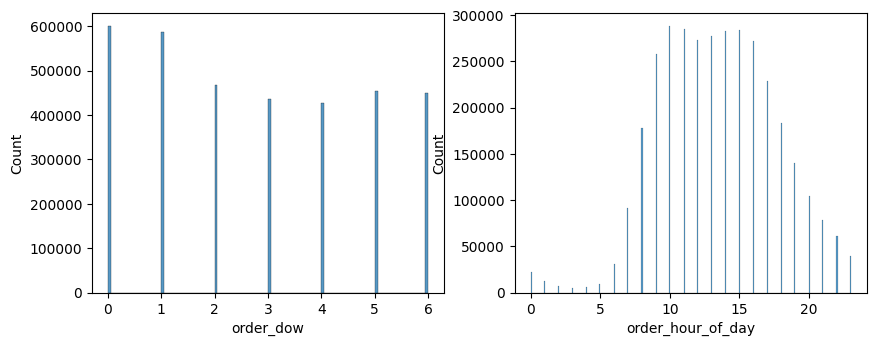

In [75]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2,2,1)
sns.histplot(data= orders,
             x = 'order_dow',
             shrink = 5,
             ax = ax1)

ax2 = fig.add_subplot(2,2,2)
sns.histplot(data= orders,
             x = 'order_hour_of_day',
             shrink = 5,
             ax = ax2)

### products


### order_products_prior

### order_products_train